handwriting analysis of msist data using Keras.
Import the necessary stuff from Keras library.


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop



In [2]:
### loading the MNIST data set.
(mnist_trainImg, mnist_trainLabel),(mnist_testImg, mnist_testLabel)= mnist.load_data()

In [3]:
#converting the data into format Keras/Tensorflow expects. The divide the image data by 255 inorder to normalize into the range 0 to 1

train_images = mnist_trainImg.reshape(60000, 784)
test_images = mnist_testImg.reshape(10000, 784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /=255

In [4]:
# converting the output labels into the'one-hot' format [-,-,-,-,-,-,-,-,-,-]
train_labels = keras.utils.to_categorical(mnist_trainLabel, 10)
test_labels = keras.utils.to_categorical(mnist_testLabel, 10)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


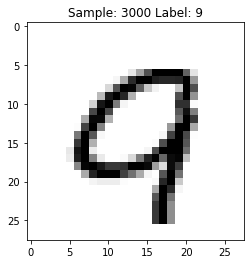

In [5]:
### lets visualize the training data to see how it looks like
%matplotlib inline
import matplotlib.pyplot as plt

def display_train_sample(num):
    # let us print the one-hot array of this data's train label
    print(train_labels[num])
    #print the label by converting it back to a number
    label = train_labels[num].argmax(axis=0)
    # reshape the 784 values to a 28 X 28 image
    image = train_images[num].reshape(28,28)
    plt.title('Sample: %d Label: %d'%(num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
display_train_sample(3000)
    

In [6]:
### setting up the neural network with Keras is easier
model = Sequential() #we can add individual layers one at a time
model.add(Dense(512, activation='relu', input_shape=(784,))) #784 input signals from each image and feeds it inot a hidden layer of 512 neurons
model.add(Dense(10, activation='softmax'))


In [7]:
# to get a summary of the network created
model.summary()
# we have two layers here, one that has 512 neurons and other that is the putput layer with 10 neurons.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [8]:
# setting up the optimization and loss function
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [9]:
# training the data is just one line of operatin using Keras
history = model.fit(train_images, train_labels, batch_size=100, epochs=10,verbose=2, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 5s - loss: 0.2398 - accuracy: 0.9302 - val_loss: 0.1212 - val_accuracy: 0.9638
Epoch 2/10
60000/60000 - 5s - loss: 0.0965 - accuracy: 0.9714 - val_loss: 0.0908 - val_accuracy: 0.9720
Epoch 3/10
60000/60000 - 5s - loss: 0.0648 - accuracy: 0.9802 - val_loss: 0.0769 - val_accuracy: 0.9769
Epoch 4/10
60000/60000 - 5s - loss: 0.0469 - accuracy: 0.9856 - val_loss: 0.0640 - val_accuracy: 0.9813
Epoch 5/10
60000/60000 - 5s - loss: 0.0350 - accuracy: 0.9898 - val_loss: 0.0725 - val_accuracy: 0.9791
Epoch 6/10
60000/60000 - 5s - loss: 0.0264 - accuracy: 0.9923 - val_loss: 0.0626 - val_accuracy: 0.9811
Epoch 7/10
60000/60000 - 5s - loss: 0.0202 - accuracy: 0.9938 - val_loss: 0.0699 - val_accuracy: 0.9801
Epoch 8/10
60000/60000 - 5s - loss: 0.0161 - accuracy: 0.9954 - val_loss: 0.0747 - val_accuracy: 0.9804
Epoch 9/10
60000/60000 - 5s - loss: 0.0119 - accuracy: 0.9964 - val_loss: 0.0694 - val_accuracy: 0.9813
Epoch 10/10
60

In [10]:
score = model.evaluate(test_images, test_labels, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 - 1s - loss: 0.0733 - accuracy: 0.9817
Test loss: 0.07328576476429352
Test accuracy: 0.9817


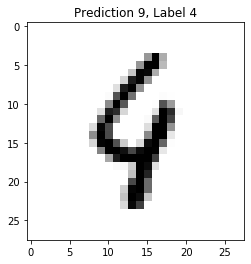

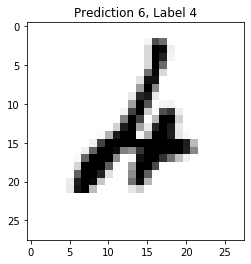

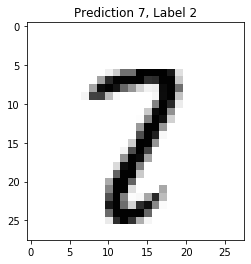

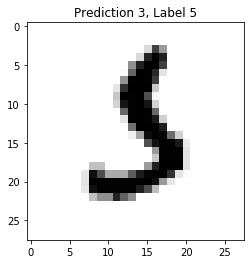

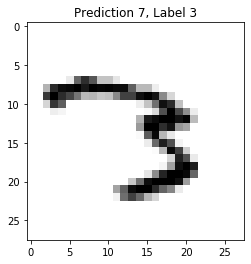

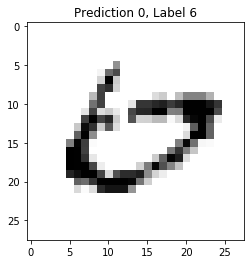

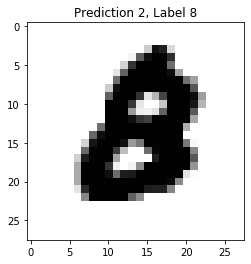

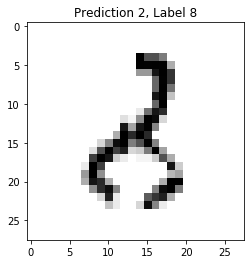

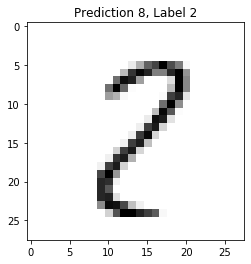

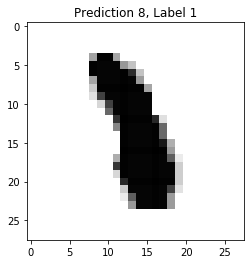

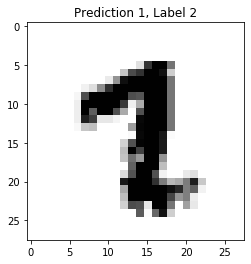

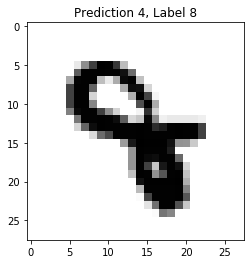

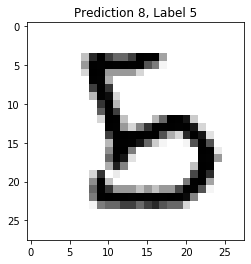

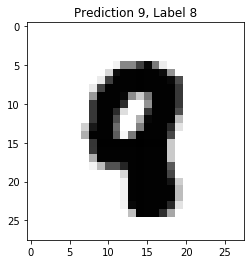

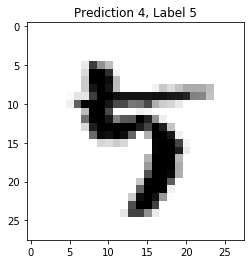

In [12]:
#taking a look at what it got wrong
for x in range(1000):
    test_image = test_images[x,:].reshape(1,784)
    predict_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if predict_cat != label:
        plt.title('Prediction %d, Label %d'%(predict_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()